In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


data: pd.DataFrame = pd.read_csv('../../data/iris.csv')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

#split data
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

In [191]:
clf = MultinomialNB()
clf.fit(trnX, trnY)
prdY = clf.predict(tstX)
cnf_mtx = metrics.confusion_matrix(tstY, prdY, labels)
print(plt.gca, cnf_mtx, labels)

<function gca at 0x0000020039EF9F28> [[15  0  0]
 [ 0 15  0]
 [ 0  2 13]] ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


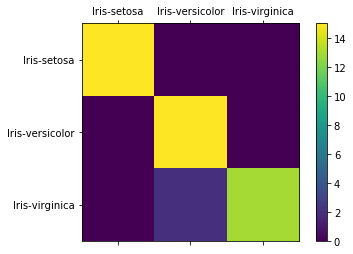

In [192]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cnf_mtx, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['','Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.set_yticklabels(['','Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.show()

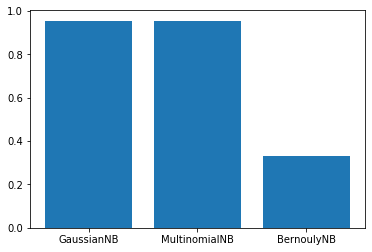

In [193]:
estimators = {'GaussianNB': GaussianNB(), 
              'MultinomialNB': MultinomialNB(), 
              'BernoulyNB': BernoulliNB()}

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
plt.bar(xvalues, yvalues)
plt.show()

In [147]:
cnf_mtx

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)